# NBA Archetypes

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, f1_score
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import plotly.express as px
import matplotlib
import sklearn
import scipy

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.4
Pandas version: 1.5.3
Matplotlib version: 3.8.0
Seaborn version: 0.12.2
Scikit-learn version: 1.1.3
SciPy version: 1.10.0


## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path =  '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
#local_path = '/Users/ericmacdougall/Downloads/NBA-Archetypes-main/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


## Data Preprocessing

In [3]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [4]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null   

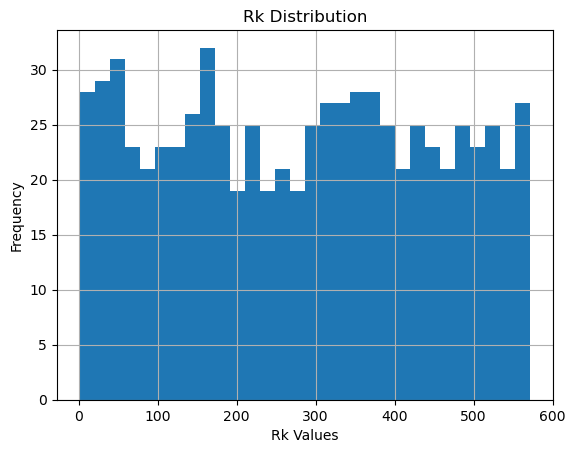

<Figure size 1000x600 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


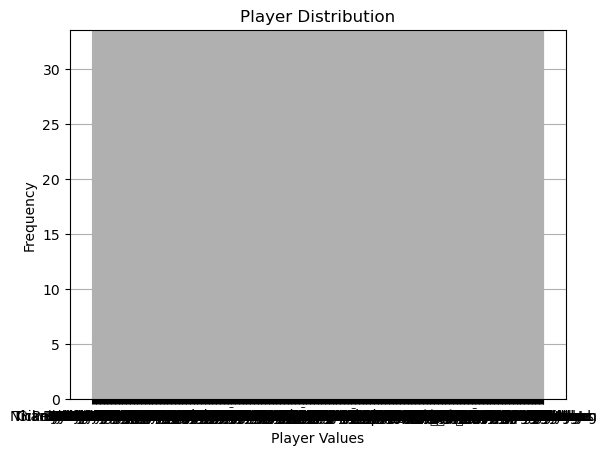

<Figure size 1000x600 with 0 Axes>

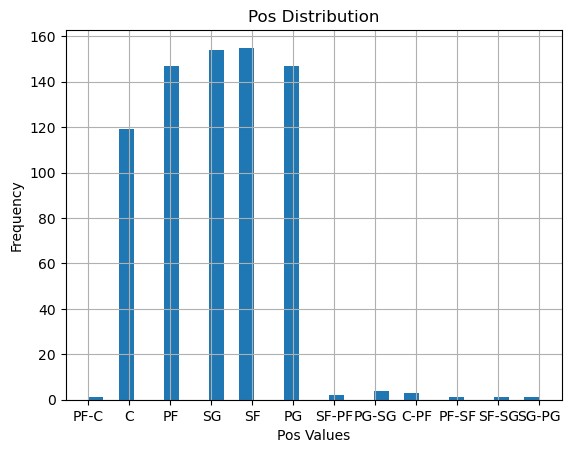

<Figure size 1000x600 with 0 Axes>

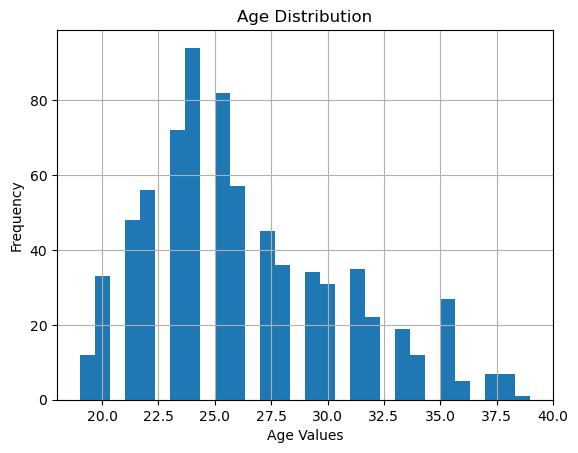

<Figure size 1000x600 with 0 Axes>

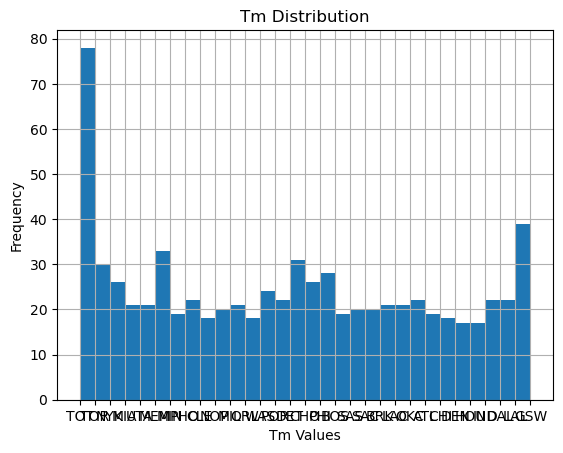

<Figure size 1000x600 with 0 Axes>

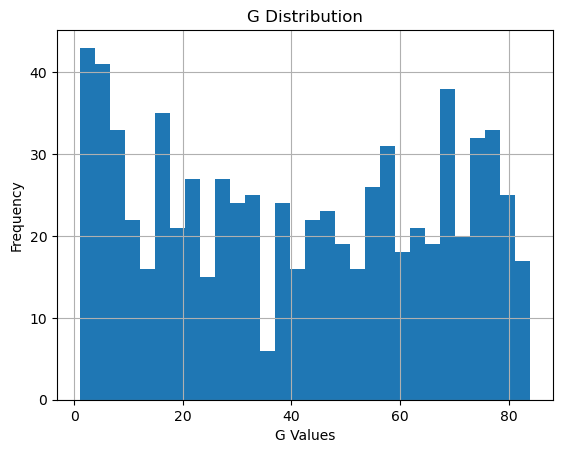

<Figure size 1000x600 with 0 Axes>

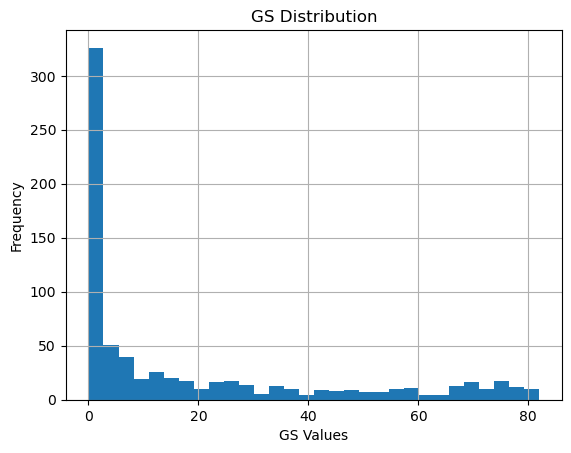

<Figure size 1000x600 with 0 Axes>

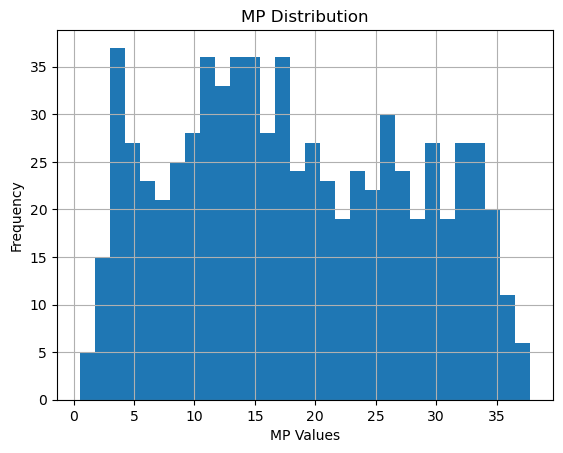

<Figure size 1000x600 with 0 Axes>

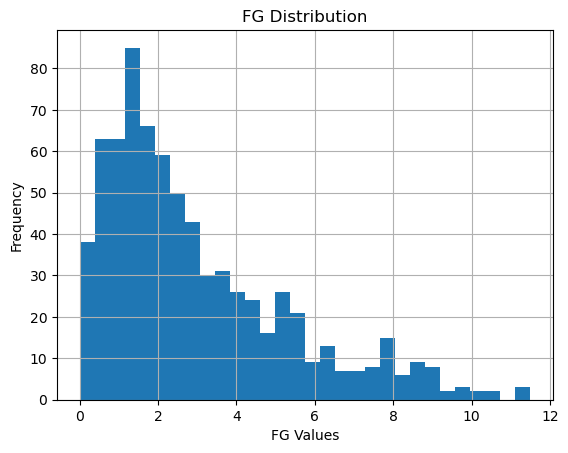

<Figure size 1000x600 with 0 Axes>

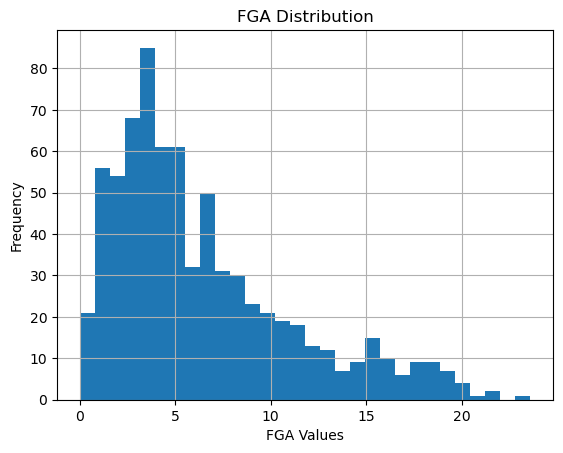

<Figure size 1000x600 with 0 Axes>

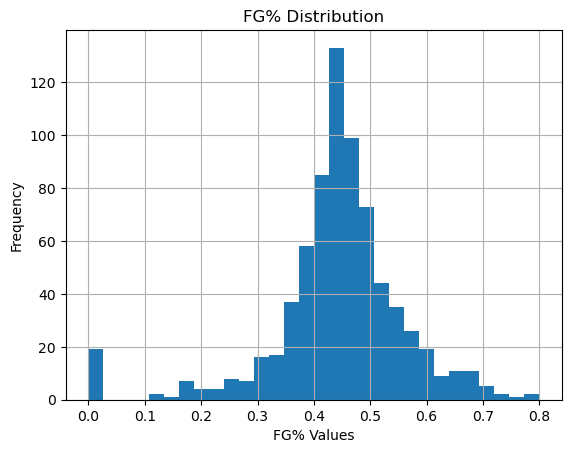

<Figure size 1000x600 with 0 Axes>

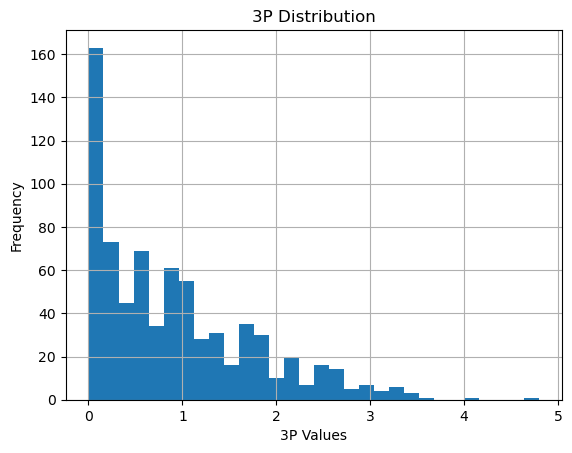

<Figure size 1000x600 with 0 Axes>

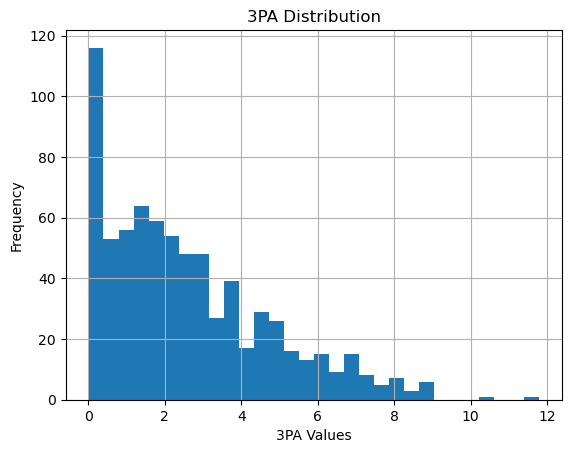

<Figure size 1000x600 with 0 Axes>

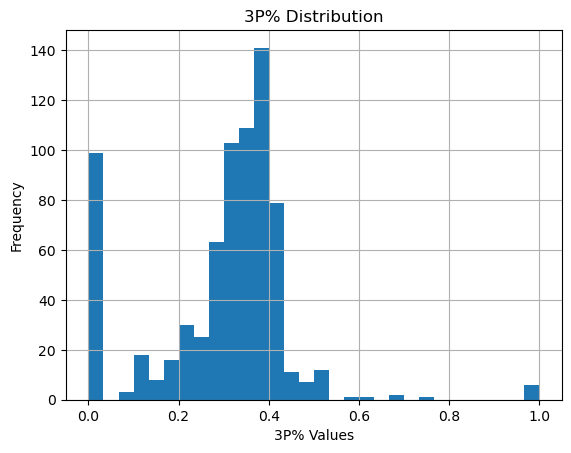

<Figure size 1000x600 with 0 Axes>

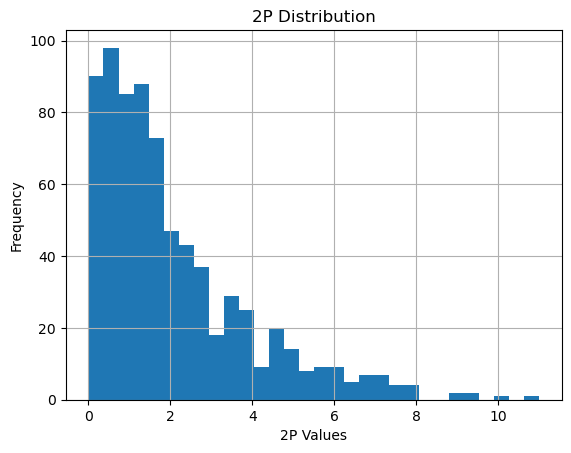

<Figure size 1000x600 with 0 Axes>

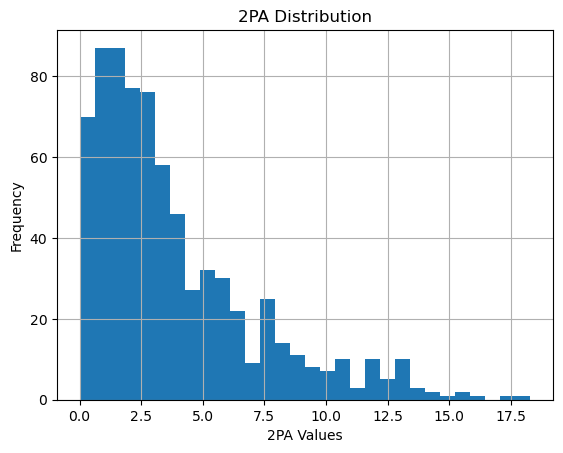

<Figure size 1000x600 with 0 Axes>

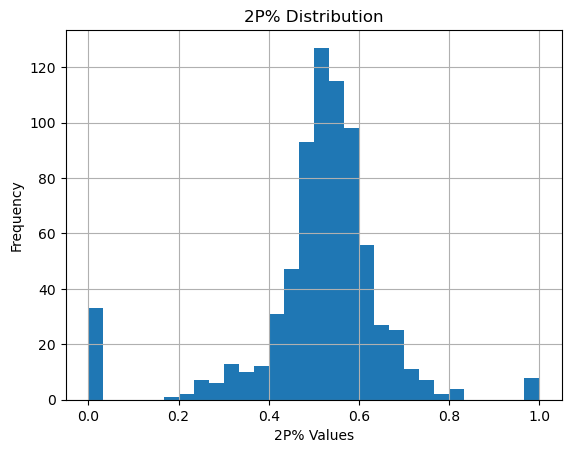

<Figure size 1000x600 with 0 Axes>

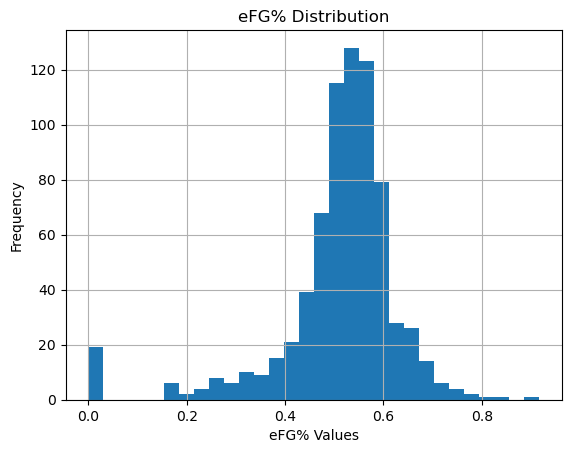

<Figure size 1000x600 with 0 Axes>

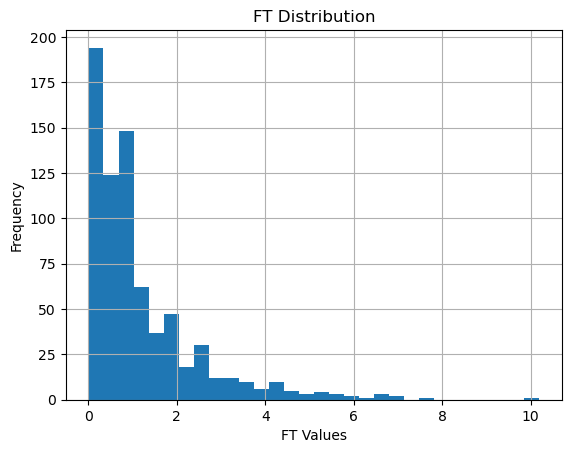

<Figure size 1000x600 with 0 Axes>

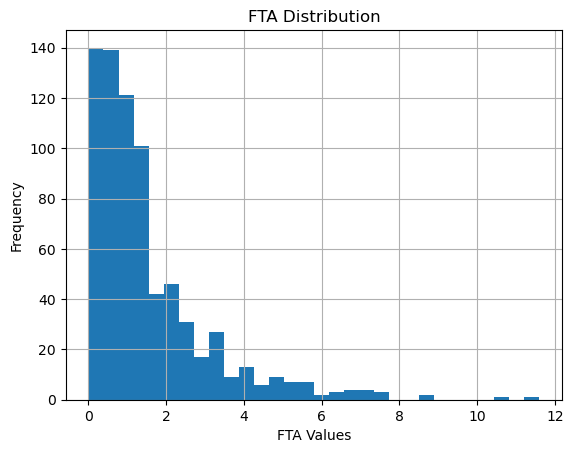

<Figure size 1000x600 with 0 Axes>

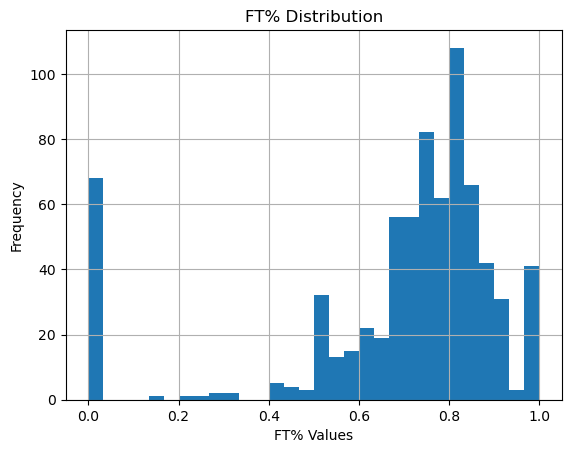

<Figure size 1000x600 with 0 Axes>

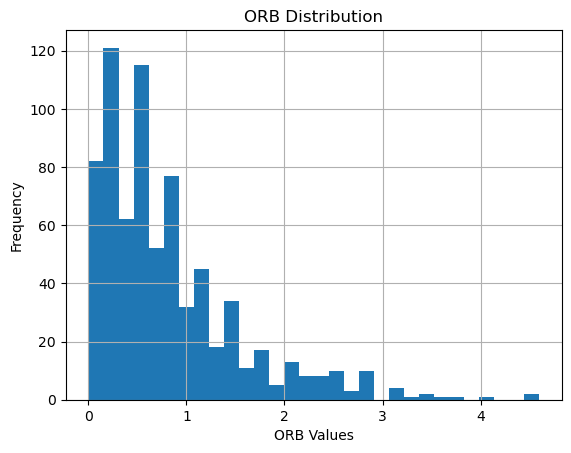

<Figure size 1000x600 with 0 Axes>

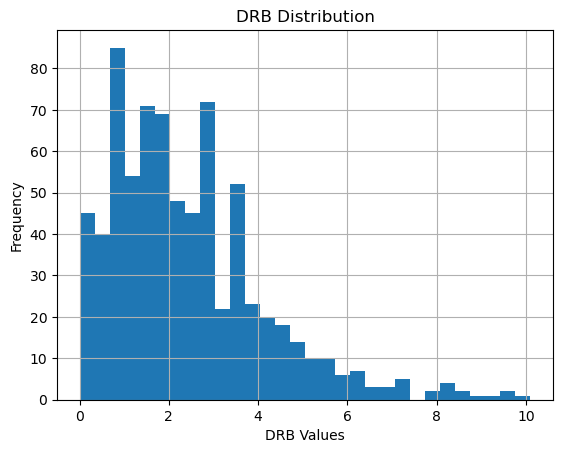

<Figure size 1000x600 with 0 Axes>

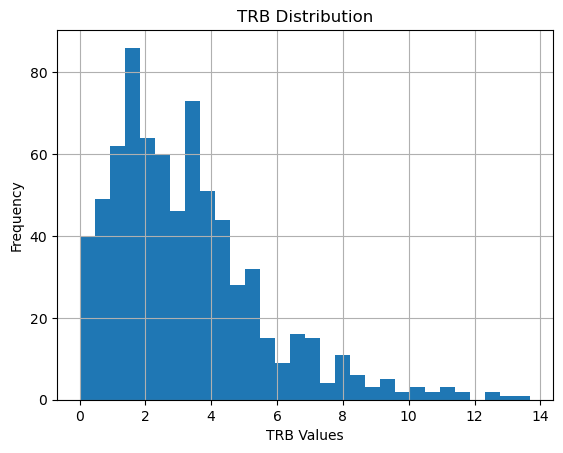

<Figure size 1000x600 with 0 Axes>

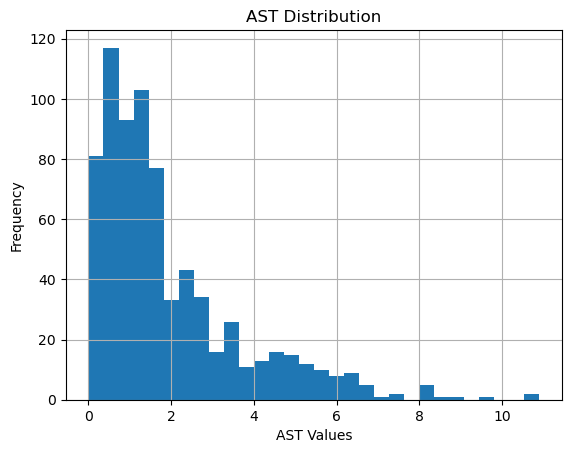

<Figure size 1000x600 with 0 Axes>

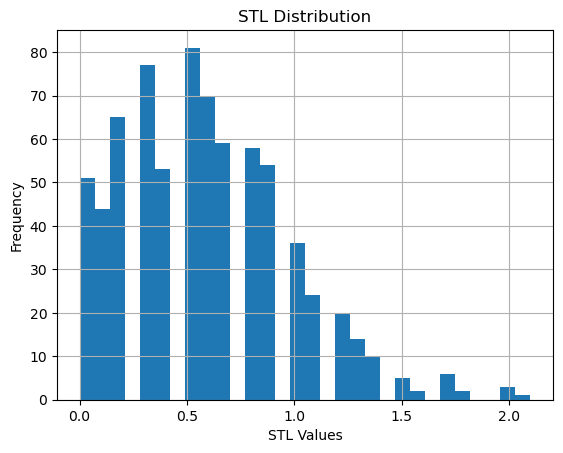

<Figure size 1000x600 with 0 Axes>

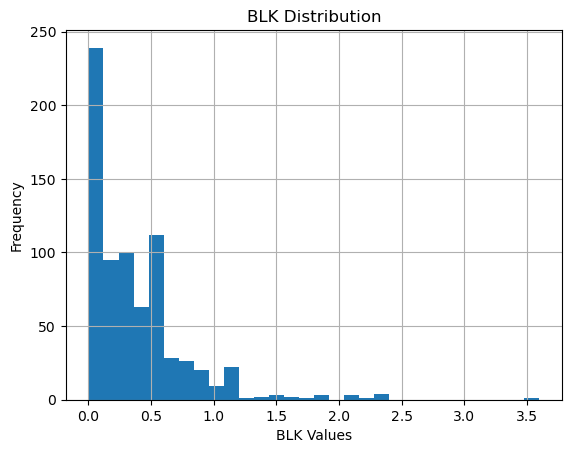

<Figure size 1000x600 with 0 Axes>

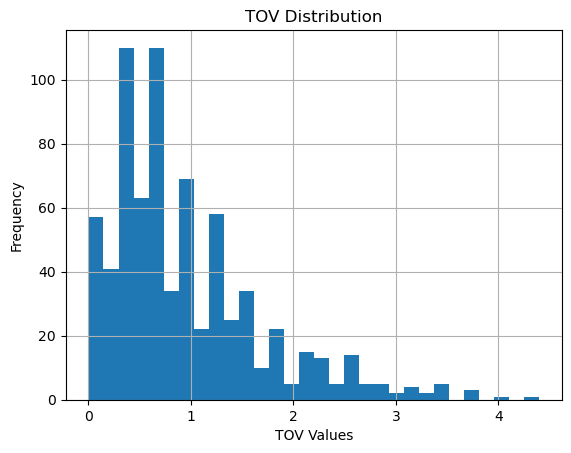

<Figure size 1000x600 with 0 Axes>

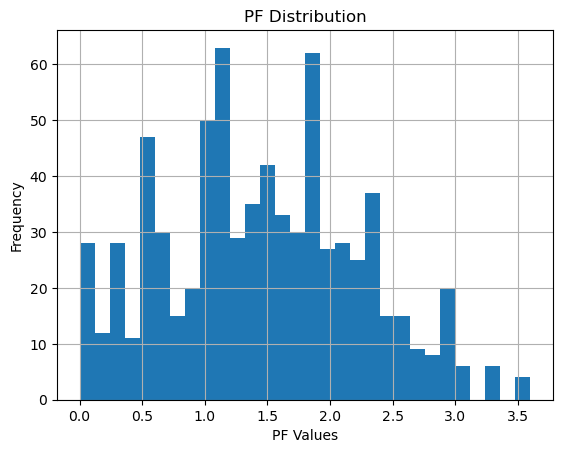

<Figure size 1000x600 with 0 Axes>

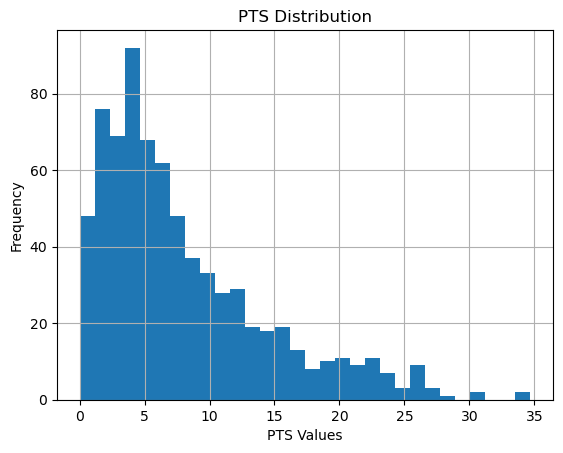

<Figure size 1000x600 with 0 Axes>

In [5]:
for col in df.columns:
    df[col].hist(bins=30)
    plt.ylabel('Frequency')
    plt.xlabel(f'{col} Values')
    plt.title(f'{col} Distribution')
    plt.figure(figsize=(10, 6))  # Optional: adjust figure size
    plt.tight_layout()
    plt.show()

In [6]:
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

data = df.copy()
data = data.drop(columns=['Player', 'Tm', 'Pos'])

model = KNN()
estimation_knn = model.fit_predict(data) == 1 
outliers_knn = (estimation_knn).sum()
print('Number of anomalies (KNN): ', outliers_knn)

model = IsolationForest(n_estimators=100)
estimation_iforest = model.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

print('Matched: ', (estimation_knn & estimation_iforest).sum())

df_clean = df.copy()
mask = ~(estimation_knn & estimation_iforest)
df_clean = df[mask]

df_clean.info()
df = df_clean.copy()

Number of anomalies (KNN):  74
Number of anomalies (isolation forest):  105
Matched:  26
<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      709 non-null    int64  
 1   Player  709 non-null    object 
 2   Pos     709 non-null    object 
 3   Age     709 non-null    int64  
 4   Tm      709 non-null    object 
 5   G       709 non-null    int64  
 6   GS      709 non-null    int64  
 7   MP      709 non-null    float64
 8   FG      709 non-null    float64
 9   FGA     709 non-null    float64
 10  FG%     709 non-null    float64
 11  3P      709 non-null    float64
 12  3PA     709 non-null    float64
 13  3P%     709 non-null    float64
 14  2P      709 non-null    float64
 15  2PA     709 non-null    float64
 16  2P%     709 non-null    float64
 17  eFG%    709 non-null    float64
 18  FT      709 non-null    float64
 19  FTA     709 non-null    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Played',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

In [8]:
df = df.drop(columns=['Age', 
                      'Rank', 
                      'Position', 
                      'Team',
                      'Games Played',
                      'Games Started',
                      'Field Goal Percentage',
                      'Three-Point Field Goal Percentage', 
                      'Two-Point Field Goal Percentage', 
                      'Effective Field Goal Percentage',
                      'Free Throw Percentage', 
                      'Total Rebounds',
                      'Field Goals Made',
                      'Field Goals Attempted'
                      ])

1) Rank ('Rk'): This is just an identifier of player rank and does not represent a player's performance, so it does not contribute to clustering.
2) Player Name ('Player'): This is also an identifier, not a numeric or performance-related feature.
3) Age ('Age'): While age can influence a player's style, it may not directly contribute to player archetypes like playing style or efficiency. If you want to account for experience or prime age, you could consider including it.
4) Team ('Tm'): Teams influence player performance but may not help identify archetypes unless you want to include team-based playing styles. You can drop this feature unless team context is crucial for the clustering.
5) Games Played ('G'): If the dataset already has a substantial number of games for each player, this might be redundant, as you may already have performance metrics (e.g., minutes played, points) that reflect their impact on the court.
6) Games Started ('GS'): Similar to 'Games Played,' this feature may not add unique information when compared to other features like 'Minutes Per Game' or 'Points'.
7) Field Goal Percentage ('FG%') and Effective Field Goal Percentage ('eFG%'): If you're using other shooting stats like 'Field Goals Made', '3P%', and '2P%', you might not need these, as they can be highly correlated.

In [9]:
aggregated_df = df.groupby('Player Name').agg({
    #'Age': 'first',  # Use the first occurrence of age, assuming age doesn’t change within a season
    #'Games Played': 'sum',  # Total games played
    #'Games Started': 'sum',  # Total games started
    'Minutes Played': 'sum',  # Total minutes played
    #'Field Goals Made': 'sum',  # Total field goals made
    #'Field Goals Attempted': 'sum',  # Total field goals attempted
    #'Field Goal Percentage': 'mean',
    'Three-Point Field Goals Made': 'sum',  # Total three-pointers made
    'Three-Point Field Goals Attempted': 'sum',  # Total three-point attempts
    #'Three-Point Field Goal Percentage': 'mean',
    'Two-Point Field Goals Made': 'sum',  # Total two-pointers made
    'Two-Point Field Goals Attempted': 'sum',  # Total two-point attempts
    #'Two-Point Field Goal Percentage': 'mean',
    #'Effective Field Goal Percentage': 'mean',
    'Free Throws Made': 'sum',  # Total free throws made
    'Free Throws Attempted': 'sum',  # Total free throw attempts
    #'Free Throw Percentage': 'mean',
    'Offensive Rebounds': 'sum',  # Total offensive rebounds
    'Defensive Rebounds': 'sum',  # Total defensive rebounds
    #'Total Rebounds': 'sum',  # Total rebounds
    'Assists': 'sum',  # Total assists
    'Steals': 'sum',  # Total steals
    'Blocks': 'sum',  # Total blocks
    'Turnovers': 'sum',  # Total turnovers
    'Personal Fouls': 'sum'  # Total personal fouls
    #'Points': 'sum'   # Total points scored
}).reset_index()

# Verify the aggregated data
analyze(aggregated_df)

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Zach LaVine,34.9,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3
543,Zavier Simpson,23.0,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6
544,Zeke Nnaji,9.9,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4
545,Ziaire Williams,20.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        547 non-null    object 
 1   Minutes Played                     547 non-null    float64
 2   Three-Point Field Goals Made       547 non-null    float64
 3   Three-Point Field Goals Attempted  547 non-null    float64
 4   Two-Point Field Goals Made         547 non-null    float64
 5   Two-Point Field Goals Attempted    547 non-null    float64
 6   Free Throws Made                   547 non-null    float64
 7   Free Throws Attempted              547 non-null    float64
 8   Offensive Rebounds                 547 non-null    float64
 9   Defensive Rebounds                 547 non-null    float64
 10  Assists                            547 non-null    float64
 11  Steals                             547 non

In [10]:
display(aggregated_df.head(30))

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
5,Aaron Nesmith,27.7,1.9,4.6,2.4,4.2,1.5,1.9,0.9,2.9,1.5,0.9,0.7,0.9,3.3
6,Aaron Wiggins,15.7,0.8,1.6,1.9,3.2,0.7,0.9,0.8,1.6,1.1,0.7,0.2,0.7,1.2
7,Adam Flagler,7.0,0.5,3.0,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,Adama Sanogo,7.3,0.0,0.0,1.6,3.0,0.9,1.3,2.1,1.9,0.0,0.1,0.0,0.6,0.6
9,Admiral Schofield,3.7,0.3,0.7,0.2,0.4,0.0,0.1,0.1,0.6,0.3,0.0,0.0,0.2,0.4


### Code

In [11]:
names = aggregated_df['Player Name']
aggregated_df = aggregated_df.drop(columns='Player Name')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(aggregated_df), columns=aggregated_df.columns)
analyze(scaled_df)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,-0.693760,0.037898,-0.086090,-0.882150,-0.917707,-0.686707,-0.760313,-0.810349,-0.807515,-0.745757,-0.832037,-0.723209,-0.909249,-0.684200
1,-0.901783,-0.690889,-0.635084,-0.598639,-0.652504,-0.623438,-0.658241,-0.710627,-0.848513,-0.745757,-0.832037,-0.723209,-0.814169,-0.973985
2,-0.832442,-0.528937,-0.391087,-0.841648,-0.763005,-0.813245,-0.862385,-0.910070,-0.889511,-0.826121,-0.986264,-0.723209,-0.719090,-1.118877
3,0.490818,-0.528937,-0.421586,0.980923,0.717714,0.641944,0.974906,1.383518,0.463418,0.459707,0.093326,0.247815,0.231701,0.040263
4,-0.387503,-0.043079,-0.147090,-0.477134,-0.453601,-0.433630,-0.505134,-0.710627,-0.684522,-0.223389,-0.369356,-0.723209,-0.433853,-0.177076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.687284,1.009613,1.072896,0.778415,0.806115,1.337904,1.179050,-0.710627,0.750403,0.620436,0.093326,-0.334799,0.897255,0.330048
543,-0.000349,-0.366984,-0.269088,-0.315127,0.143106,-0.623438,-0.607205,-0.411464,-0.274543,0.499889,0.401780,-0.140594,0.231701,-0.177076
544,-0.757323,-0.852842,-0.879081,-0.558137,-0.542002,-0.433630,-0.352026,0.087142,-0.766517,-0.705575,-0.677810,0.442020,-0.624011,-0.321969
545,-0.150588,-0.043079,0.127407,-0.274626,-0.210498,-0.117285,-0.147883,-0.311743,-0.069554,-0.343936,-0.060901,-0.529004,0.136622,-0.104630


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Played                     547 non-null    float64
 1   Three-Point Field Goals Made       547 non-null    float64
 2   Three-Point Field Goals Attempted  547 non-null    float64
 3   Two-Point Field Goals Made         547 non-null    float64
 4   Two-Point Field Goals Attempted    547 non-null    float64
 5   Free Throws Made                   547 non-null    float64
 6   Free Throws Attempted              547 non-null    float64
 7   Offensive Rebounds                 547 non-null    float64
 8   Defensive Rebounds                 547 non-null    float64
 9   Assists                            547 non-null    float64
 10  Steals                             547 non-null    float64
 11  Blocks                             547 non

## EDA

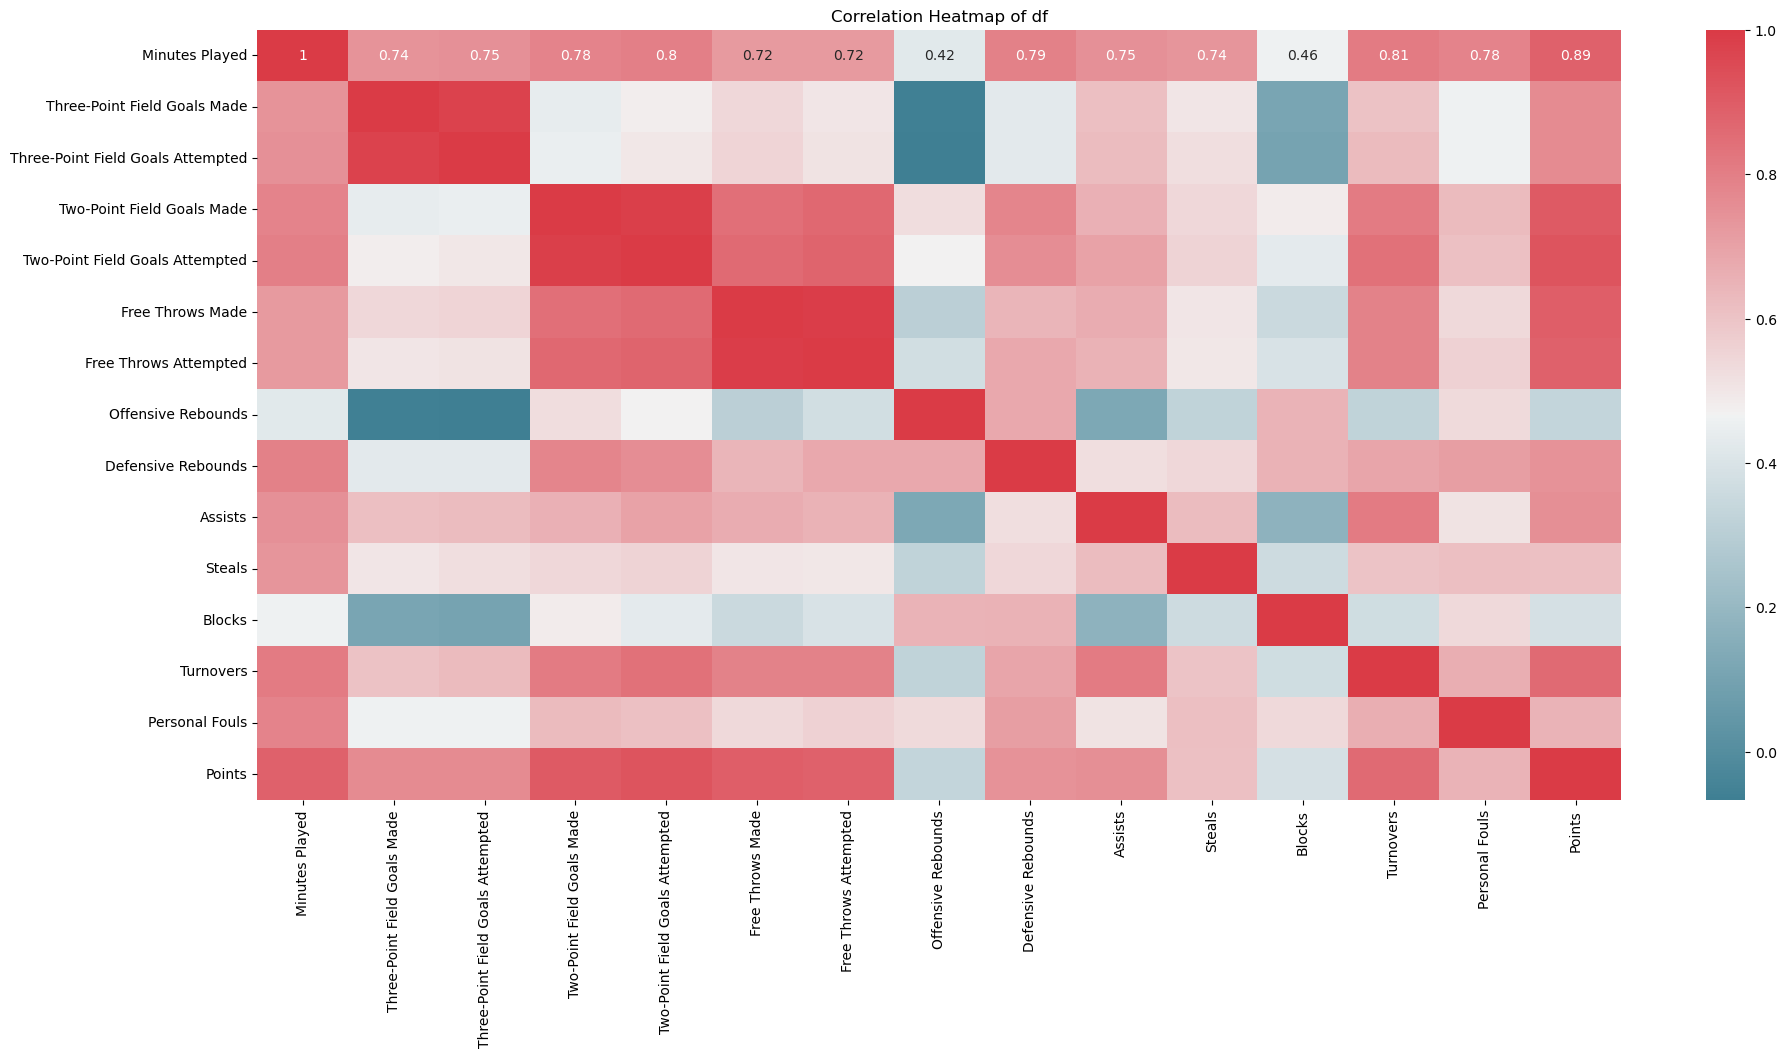

In [12]:
numerical_columns = df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap of df')
plt.show()

## PCA

- Original data had 30 features
- Used principal component analysis to reduce that down to 6 components
- Chose 6 because it retained 96% of the information but still significantly reduced down dimensions
- Reataining 95% of the information was the goal

For n_components = 2, explained variance ratio is 0.809780684959226
For n_components = 3, explained variance ratio is 0.8853845582308784
For n_components = 4, explained variance ratio is 0.9172915772788026
For n_components = 5, explained variance ratio is 0.9384933732737104
For n_components = 6, explained variance ratio is 0.9558540343461651
For n_components = 7, explained variance ratio is 0.9699615157658036
For n_components = 8, explained variance ratio is 0.9806285732848256
For n_components = 9, explained variance ratio is 0.9884701109900343
For n_components = 10, explained variance ratio is 0.9951654138114625
For n_components = 11, explained variance ratio is 0.9978322064631432
For n_components = 12, explained variance ratio is 0.9989572562302483
For n_components = 13, explained variance ratio is 0.9995543081033375


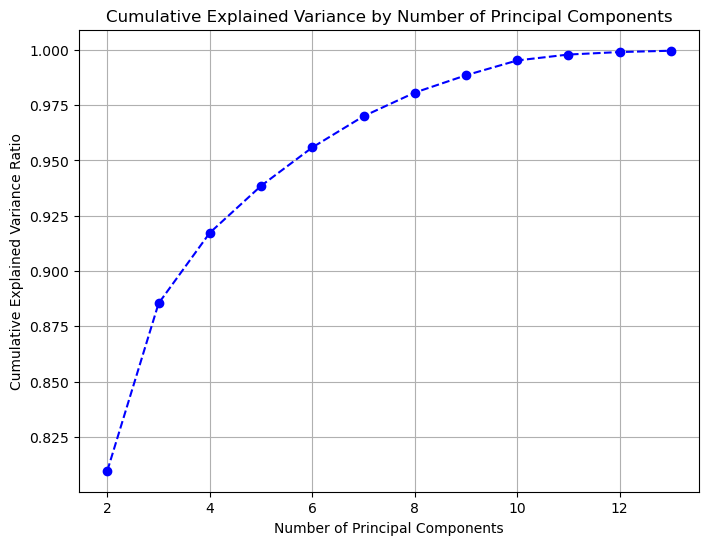

In [13]:
variance_list = []

for n_components in range(2,14):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_df)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 14), variance_list, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

For n_clusters = 2, silhouette score is 0.481185
For n_clusters = 3, silhouette score is 0.406661
For n_clusters = 4, silhouette score is 0.283983
For n_clusters = 5, silhouette score is 0.291491
For n_clusters = 6, silhouette score is 0.294497
For n_clusters = 7, silhouette score is 0.287767
For n_clusters = 8, silhouette score is 0.255168
For n_clusters = 9, silhouette score is 0.235265
For n_clusters = 10, silhouette score is 0.225693
For n_clusters = 11, silhouette score is 0.231279
For n_clusters = 12, silhouette score is 0.220656
For n_clusters = 13, silhouette score is 0.214421
For n_clusters = 14, silhouette score is 0.211643
For n_clusters = 15, silhouette score is 0.217600


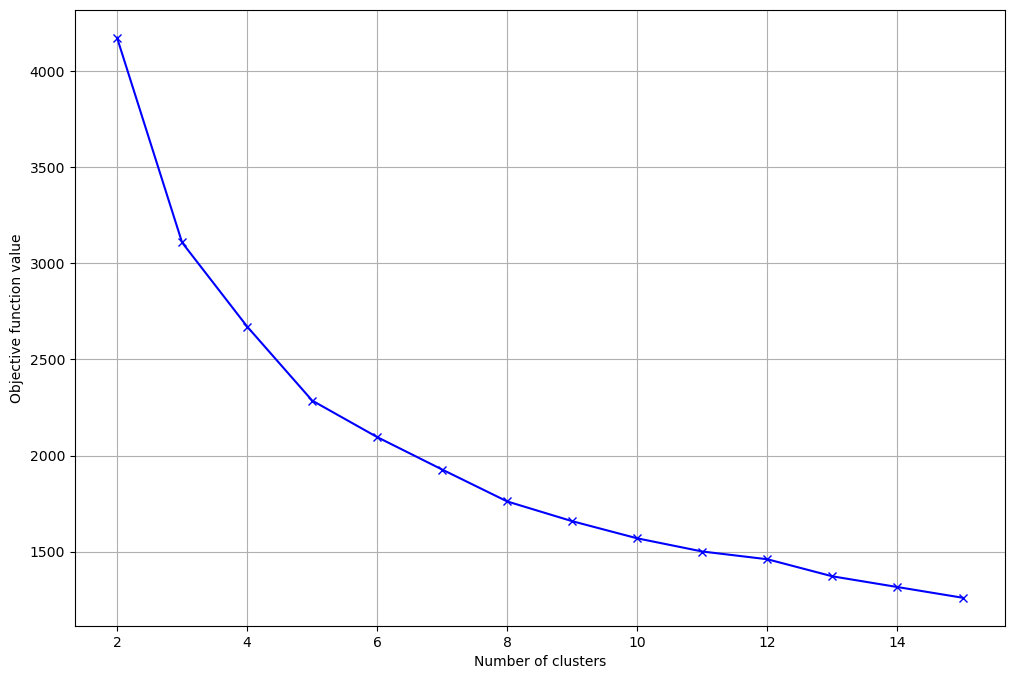

In [14]:
# Perform PCA to reduce data to 6 components
pca_6 = PCA(n_components=7)
reduced_data = pca_6.fit_transform(scaled_df)

# Initialize a list to store silhouette scores
silhouette_scores = []
distortion = []

# Range for the number of clusters
K = range(2, 16)  # Start from 2 because silhouette score is undefined for 1 cluster

# Calculate silhouette score for each value of K
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(reduced_data)
    score = silhouette_score(scaled_df, model.labels_)
    silhouette_scores.append(score)
    distortion.append(model.inertia_)

    # Output the silhouette score for each k
    print(f"For n_clusters = {k}, silhouette score is {score:.6f}")

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()


In [15]:
'''
# Perform PCA to reduce the data to 6 components
pca = PCA(n_components=6)
scaled_df_pca_6 = pca.fit_transform(scaled_df)

# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=12345)
kmeans.fit(components_6)

# Reduce data to 2 components for visualization
pca_2d = PCA(n_components=2)
scaled_df_pca_2d = pca_2d.fit_transform(components_6)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = pca_2d.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')
plt.legend(labels=labels)

# Show the plot
plt.show()
'''

"\n# Perform PCA to reduce the data to 6 components\npca = PCA(n_components=6)\nscaled_df_pca_6 = pca.fit_transform(scaled_df)\n\n# Fit KMeans with 5 clusters\nkmeans = KMeans(n_clusters=5, random_state=12345)\nkmeans.fit(components_6)\n\n# Reduce data to 2 components for visualization\npca_2d = PCA(n_components=2)\nscaled_df_pca_2d = pca_2d.fit_transform(components_6)\n\n# Get the cluster labels and centroids\nlabels = kmeans.labels_\ncentroids = pca_2d.transform(kmeans.cluster_centers_)\n\n# Plot the clusters\nplt.figure(figsize=(10, 8))\nplt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)\nplt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')\n\n# Add labels and title\nplt.xlabel('PCA Component 1')\nplt.ylabel('PCA Component 2')\nplt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')\nplt.legend(labels=labels)\n\n# Show the plot\nplt.show()\n"

In [16]:

kmeans = KMeans(n_clusters=6, random_state=12345)
kmeans.fit(reduced_data)
labels = kmeans.labels_


# Step 3: Reduce to 2 PCA components for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data)

# Project centroids into the 2D PCA space
centroids = pca_2d.transform(kmeans.cluster_centers_)


df_pca = pd.DataFrame(reduced_data_2d, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = labels.astype(str)  # Add cluster labels to the DataFrame

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
    
# Create the scatter plot using Plotly Express
fig = px.scatter(
        df_pca, 
        x='PCA Component 1', 
        y='PCA Component 2', 
        color='Cluster',  # Color by cluster labels
        color_discrete_map=color_map,  # Match the 'viridis' color scale
        opacity=0.6,  # Set transparency
        title='KMeans Clusters and Centroids (Reduced to 2 Components)',
        labels={'PCA Component 1': 'PCA Component 1', 'PCA Component 2': 'PCA Component 2'},
        template=None  # Optional: use a dark theme
    )

    # Add centroids to the plot as red 'x' markers
fig.add_scatter(
        x=centroids[:, 0], 
        y=centroids[:, 1], 
        mode='markers', 
        marker=dict(color='red', size=15, symbol='x', line=dict(width=2, color='DarkSlateGrey')),
        name='Centroids', 
        hoverinfo='text', 
        text=['Centroid'] * len(centroids)
)

    # Show the plot
fig.show()

Five clusters also correspond to a five-member basketball team that is allowed on a court at any one time.

In [17]:
aggregated_df['Player Name'] = names
aggregated_df['Archetype'] = labels.astype(str)

columns = ['Player Name', 'Archetype'] + [col for col in aggregated_df.columns if col not in ['Player Name', 'Archetype']]
aggregated_df = aggregated_df[columns]

# Display the updated DataFrame
display(aggregated_df)

,Player Name,Archetype,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,1,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,1,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,1,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,2,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,1,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Zach LaVine,3,34.9,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3
543,Zavier Simpson,2,23.0,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6
544,Zeke Nnaji,1,9.9,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4
545,Ziaire Williams,2,20.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7


1    40.585009
2    34.369287
3    15.173675
0     5.850091
5     3.107861
4     0.914077
Name: Archetype, dtype: float64


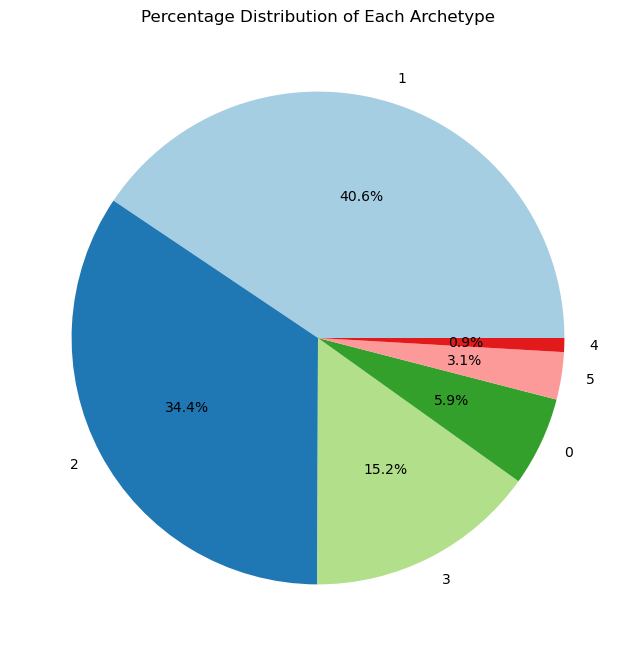

In [18]:
# Calculate the percentage of each archetype
archetype_counts = aggregated_df['Archetype'].value_counts(normalize=True) * 100

# Display the results as percentages
print(archetype_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Each Archetype')
plt.show()

In [19]:
loadings = pca_6.components_

# Create a DataFrame for better visualization
loading_df = pd.DataFrame(loadings, columns=scaled_df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Display the loadings
display(loading_df)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
PC1,0.307921,0.238233,0.245628,0.290467,0.294662,0.278129,0.281773,0.195689,0.289148,0.267433,0.255941,0.189610,0.297685,0.276861
PC2,-0.049552,-0.420211,-0.406783,0.116572,0.055132,-0.076886,-0.019762,0.542499,0.214463,-0.233899,-0.040336,0.464458,-0.079899,0.117576
PC3,-0.199396,-0.250096,-0.261207,0.315369,0.313400,0.407472,0.405772,-0.110999,-0.089531,0.038403,-0.341273,-0.255403,0.096937,-0.296980
PC4,0.035466,-0.386881,-0.326659,0.010971,0.036936,-0.168885,-0.159586,0.054794,-0.108944,0.481898,0.487726,-0.399037,0.177612,0.105523
PC5,-0.115462,-0.110400,-0.112416,-0.095929,-0.100249,0.172890,0.135610,-0.440568,-0.193193,0.214314,0.350522,0.660676,-0.011000,-0.239740
PC6,0.015936,0.002814,0.044507,-0.025188,-0.022496,0.278625,0.268449,0.137806,-0.101546,-0.476820,0.602463,-0.250094,-0.403386,-0.045080
PC7,-0.010603,-0.143794,-0.130866,-0.352647,-0.351578,0.303682,0.286856,-0.114724,-0.116168,-0.041970,-0.178346,-0.046292,0.153139,0.673638


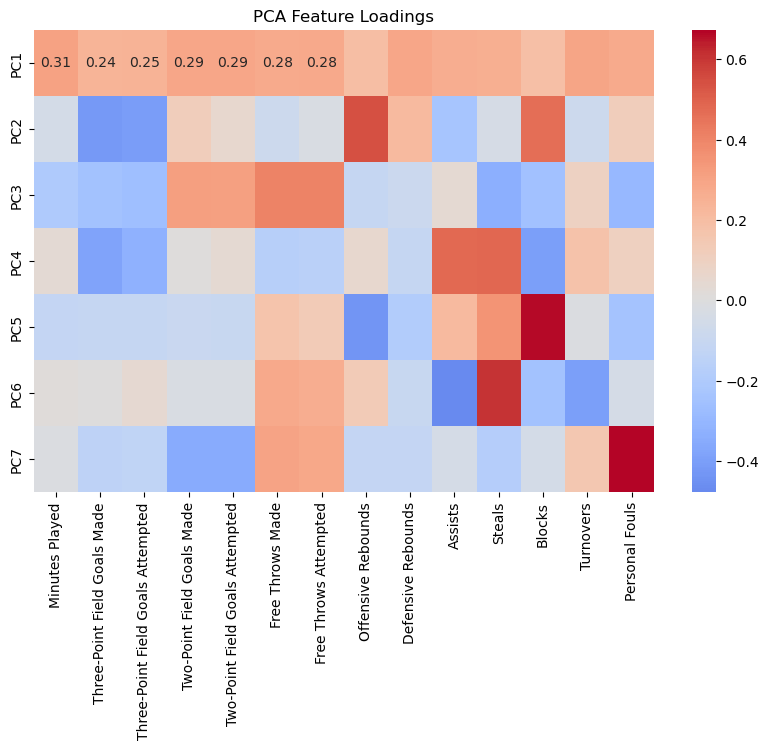

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Feature Loadings')
plt.show()

In [21]:
''''
import plotly.graph_objects as go
# Perform PCA with 6 components
pca_6 = PCA(n_components=6)
reduced_data = pca_6.fit_transform(scaled_df)

# Assuming kmeans has been fitted already
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(6)])
centroids["cluster"] = [0, 1, 2, 3, 4]  # Adjust based on the number of clusters

# Create the parallel coordinates plot
fig = go.Figure(data=go.Parcoords(
    line=dict(color=centroids["cluster"],
              colorscale="Jet", showscale=True),
    dimensions=[dict(label=col, values=centroids[col]) for col in centroids.columns[:-1]]  # Exclude the 'cluster' column
))

fig.update_layout(
    title="Parallel Coordinate Plot for NBA Players using Centroids",
)

fig.show()
'''

'\'\nimport plotly.graph_objects as go\n# Perform PCA with 6 components\npca_6 = PCA(n_components=6)\nreduced_data = pca_6.fit_transform(scaled_df)\n\n# Assuming kmeans has been fitted already\ncentroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f\'PC{i+1}\' for i in range(6)])\ncentroids["cluster"] = [0, 1, 2, 3, 4]  # Adjust based on the number of clusters\n\n# Create the parallel coordinates plot\nfig = go.Figure(data=go.Parcoords(\n    line=dict(color=centroids["cluster"],\n              colorscale="Jet", showscale=True),\n    dimensions=[dict(label=col, values=centroids[col]) for col in centroids.columns[:-1]]  # Exclude the \'cluster\' column\n))\n\nfig.update_layout(\n    title="Parallel Coordinate Plot for NBA Players using Centroids",\n)\n\nfig.show()\n'

Minutes Played            Three-Point Field Goals Made            \
                    mean        std                         mean       std   
Archetype                                                                    
0              43.200000  12.951996                     0.925000  0.870298   
1               9.272523   4.504268                     0.395946  0.401053   
2              23.748404   6.332443                     1.181383  0.815245   
3              35.455422   7.425997                     2.257831  0.921706   
4              95.000000   5.596427                     5.620000  1.742699   
5              74.170588  15.173199                     4.452941  1.834093   

          Three-Point Field Goals Attempted            \
                                       mean       std   
Archetype                                               
0                                  3.000000  2.622114   
1                                  1.243694  1.020572   
2                                  3.284574  2.068797   
3                                  6.313253  2.498086   
4                                 15.080000  4.424025   
5                                 12.141176  4.533632   

          Two-Point Field Goals Made            \
                                mean       std   
Archetype                                        
0                           5.790625  2.482501   
1                           0.777477  0.558470   
2                           2.223404  0.953342   
3                           4.690361  1.546563   
4                          14.780000  5.441231   
5                           6.847059  2.466556   

          Two-Point Field Goals Attempted            ...    Assists            \
                                     mean       std  ...       mean       std   
Archetype                                            ...                        
0                                9.946875  4.263119  ...   3.078125  1.539949   
1                                1.508559  0.943119  ...   0.793243  0.641477   
2                                4.087766  1.644635  ...   2.153723  1.406340   
3                                9.160241  2.654262  ...   4.689157  1.808517   
4                               28.220000  7.667594  ...  14.380000  3.303332   
5                               13.047059  4.385932  ...   8.711765  2.665727   

             Steals              Blocks           Turnovers            \
               mean       std      mean       std      mean       std   
Archetype                                                               
0          1.403125  0.876387  1.771875  0.801303  2.084375  0.856139   
1          0.272973  0.215022  0.181982  0.210020  0.398649  0.284832   
2          0.813830  0.391105  0.509043  0.338561  1.053723  0.419494   
3          1.122892  0.514977  0.506024  0.281698  2.224096  0.684246   
4          2.300000  0.543139  0.840000  0.288097  5.440000  0.823408   
5          2.429412  0.708665  1.141176  0.597975  3.964706  0.900653   

          Personal Fouls            
                    mean       std  
Archetype                           
0               3.862500  1.548100  
1               0.843243  0.516536  
2               1.954787  0.608960  
3               2.461446  0.816123  
4               6.040000  0.896103  
5               5.652941  1.943617  

[6 rows x 28 columns]

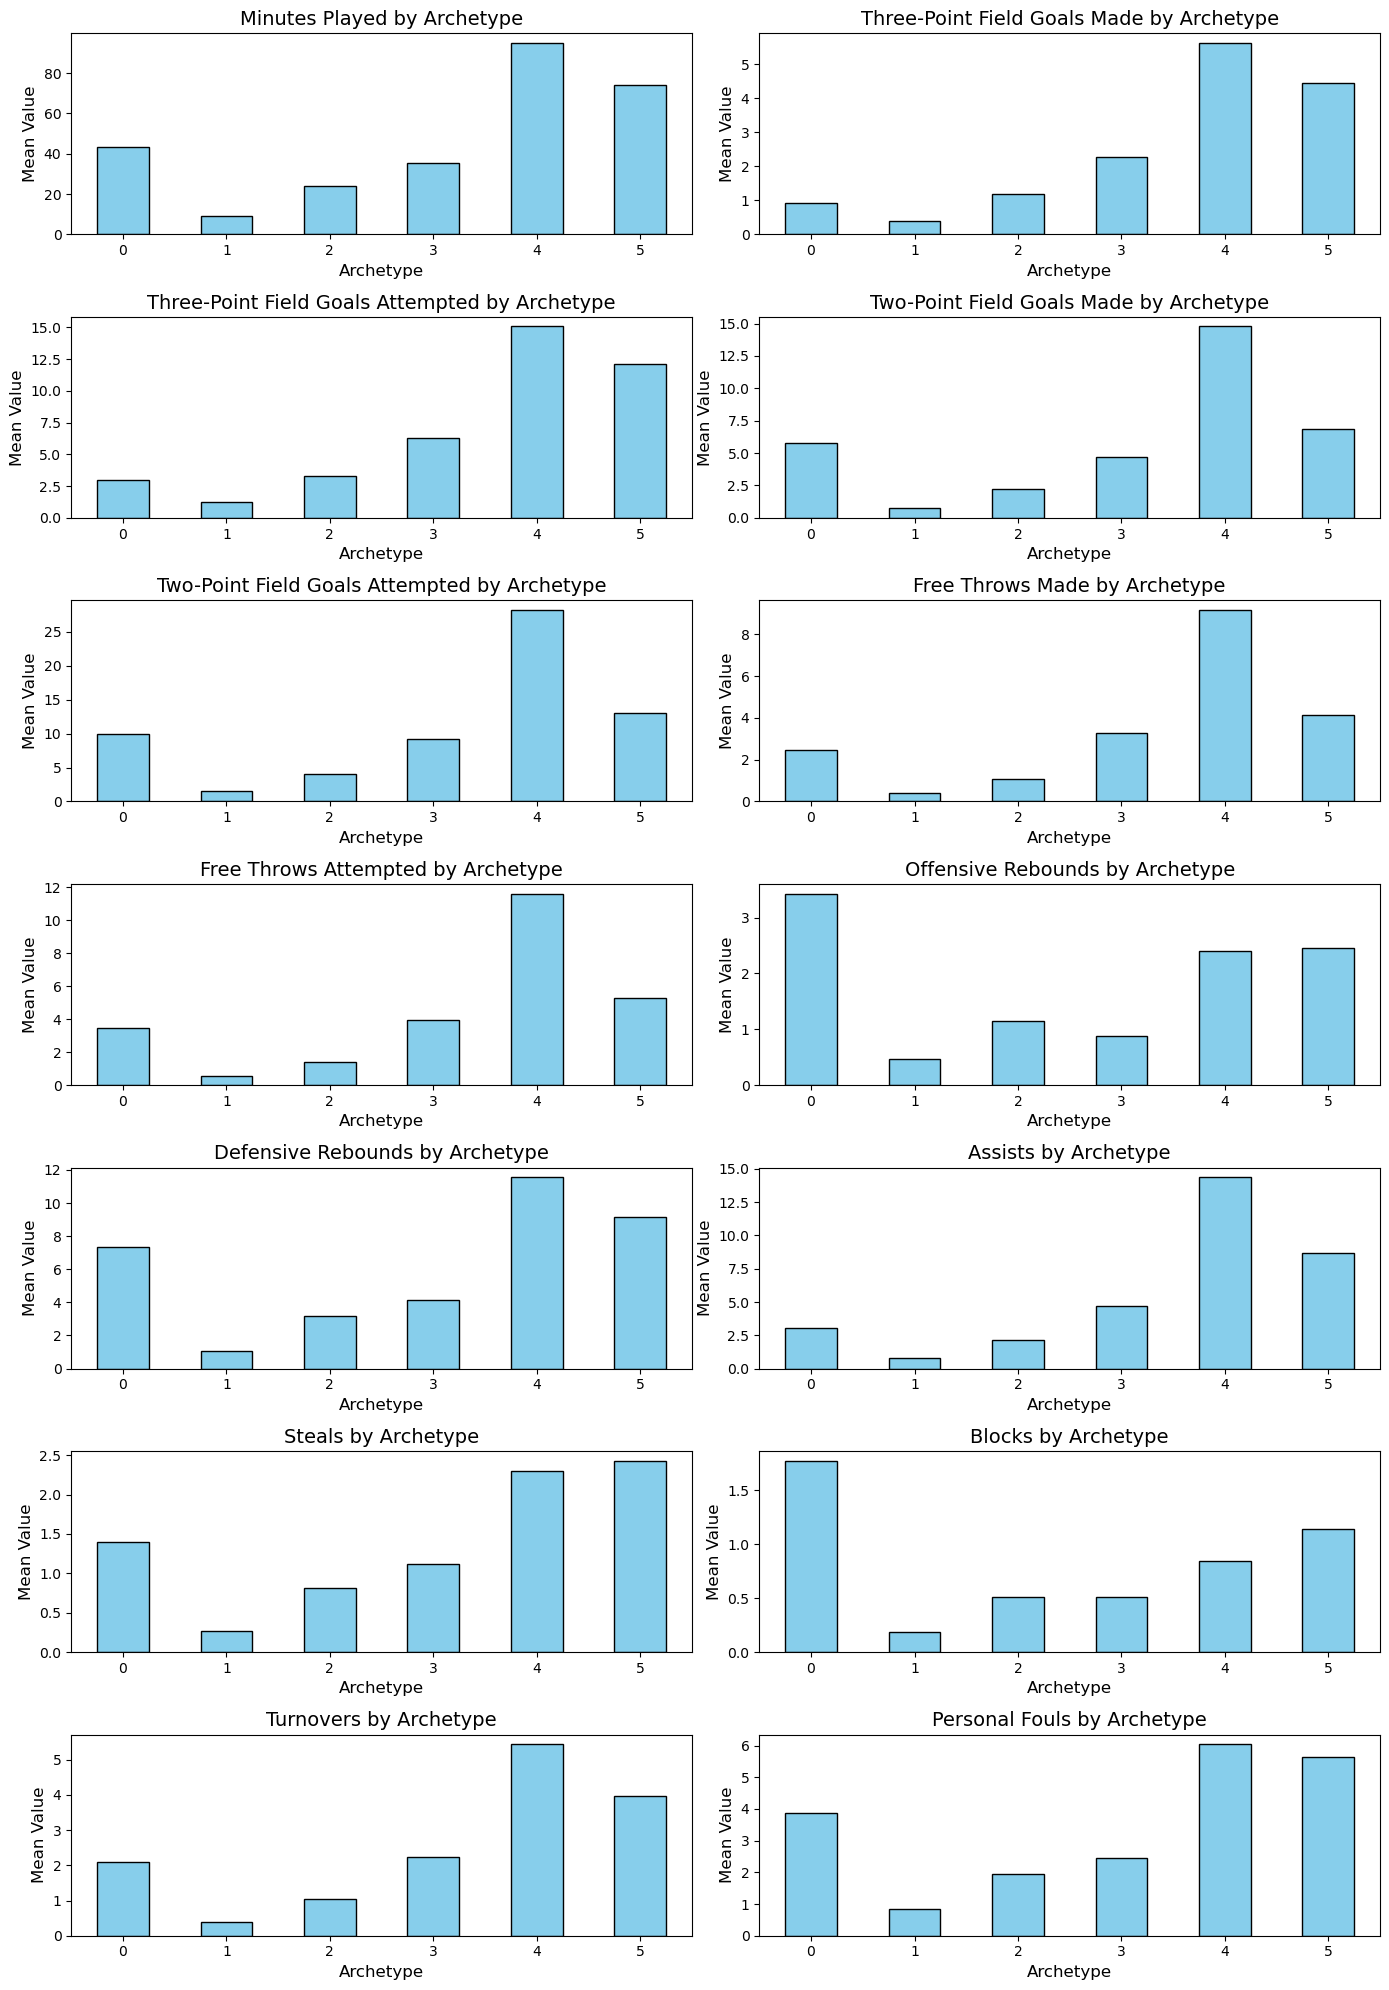

In [22]:
# Grouping by 'Cluster' and calculating the mean for each feature
cluster_stats = aggregated_df.groupby('Archetype').agg({
    #'Age': ['mean', 'std'],
    #'Games Played': ['mean', 'std'],
    'Minutes Played': ['mean', 'std'],
    'Three-Point Field Goals Made': ['mean', 'std'],
    'Three-Point Field Goals Attempted': ['mean', 'std'],
    'Two-Point Field Goals Made': ['mean', 'std'],
    'Two-Point Field Goals Attempted': ['mean', 'std'],
    'Free Throws Made': ['mean', 'std'],
    'Free Throws Attempted': ['mean', 'std'],
    'Offensive Rebounds': ['mean', 'std'],
    'Defensive Rebounds': ['mean', 'std'],
    'Assists': ['mean', 'std'],
    'Steals': ['mean', 'std'],
    'Blocks': ['mean', 'std'],
    'Turnovers': ['mean', 'std'],
    'Personal Fouls': ['mean', 'std']
    #'Points': ['mean', 'std']
})
display(cluster_stats)
	
# Flatten the multi-level column names for easier access
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# List of features to plot
features = ['Minutes Played', 'Three-Point Field Goals Made', 'Three-Point Field Goals Attempted',
            'Two-Point Field Goals Made', 'Two-Point Field Goals Attempted', 'Free Throws Made', 'Free Throws Attempted', 'Offensive Rebounds', 
            'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 
            'Personal Fouls']

# Set up the figure for the bar plots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))  # 7 rows, 2 columns of bar charts
axes = axes.flatten()

# Loop over the features and plot the bar chart for each
for i, feature in enumerate(features):
    # Plot the mean for each cluster
    cluster_stats[f'{feature}_mean'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Add title and labels
    axes[i].set_title(f'{feature} by Archetype', fontsize=14)
    axes[i].set_xlabel('Archetype', fontsize=12)
    axes[i].set_ylabel('Mean Value', fontsize=12)
    axes[i].set_xticklabels(cluster_stats.index, rotation=0)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest to predict the cluster labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(scaled_df, kmeans.labels_)

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to display the features and their importance
importance_df = pd.DataFrame({
    'Feature': scaled_df.columns,  # Use feature names from scaled_df
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df)

                              Feature  Importance
0                      Minutes Played    0.199835
8                  Defensive Rebounds    0.109122
4     Two-Point Field Goals Attempted    0.096255
5                    Free Throws Made    0.075957
13                     Personal Fouls    0.070490
10                             Steals    0.066879
12                          Turnovers    0.065494
3          Two-Point Field Goals Made    0.062079
6               Free Throws Attempted    0.057133
7                  Offensive Rebounds    0.045371
11                             Blocks    0.043614
2   Three-Point Field Goals Attempted    0.037669
1        Three-Point Field Goals Made    0.035384
9                             Assists    0.034720


In [24]:
df.head()

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,Precious Achiuwa,21.9,0.4,1.3,2.8,5.0,0.9,1.5,2.6,4.0,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,17.5,0.5,1.9,2.6,4.9,1.0,1.7,2.0,3.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,24.2,0.3,1.0,2.9,5.1,0.9,1.4,2.9,4.3,1.1,0.6,1.1,1.1,2.1,7.6
4,Ochai Agbaji,21.0,0.8,2.7,1.5,2.8,0.5,0.7,0.9,1.8,1.1,0.6,0.6,0.8,1.5,5.8
5,Ochai Agbaji,19.7,0.9,2.8,1.2,2.1,0.3,0.4,0.7,1.8,0.9,0.5,0.6,0.7,1.3,5.4


In [25]:
scaled_df['Cluster']=labels.astype(str)
scaled_df.head(10)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Cluster
0,-0.693760,0.037898,-0.086090,-0.882150,-0.917707,-0.686707,-0.760313,-0.810349,-0.807515,-0.745757,-0.832037,-0.723209,-0.909249,-0.684200,1
1,-0.901783,-0.690889,-0.635084,-0.598639,-0.652504,-0.623438,-0.658241,-0.710627,-0.848513,-0.745757,-0.832037,-0.723209,-0.814169,-0.973985,1
2,-0.832442,-0.528937,-0.391087,-0.841648,-0.763005,-0.813245,-0.862385,-0.910070,-0.889511,-0.826121,-0.986264,-0.723209,-0.719090,-1.118877,1
3,0.490818,-0.528937,-0.421586,0.980923,0.717714,0.641944,0.974906,1.383518,0.463418,0.459707,0.093326,0.247815,0.231701,0.040263,2
4,-0.387503,-0.043079,-0.147090,-0.477134,-0.453601,-0.433630,-0.505134,-0.710627,-0.684522,-0.223389,-0.369356,-0.723209,-0.433853,-0.177076,1
5,0.271238,0.604732,0.401904,-0.031616,-0.099997,0.072522,0.056261,-0.112300,-0.028556,-0.343936,0.247553,0.442020,-0.243695,1.054510,2
6,-0.422174,-0.286008,-0.513085,-0.234124,-0.320999,-0.433630,-0.454098,-0.212021,-0.561528,-0.504664,-0.060901,-0.529004,-0.433853,-0.466861,1
7,-0.924897,-0.528937,-0.086090,-1.003654,-0.917707,-0.876514,-0.913421,-1.009791,-1.217494,-0.143025,-1.140491,-0.917414,-1.099407,-1.336216,1
8,-0.907562,-0.933818,-1.001080,-0.355629,-0.365200,-0.307092,-0.249954,1.084354,-0.438535,-0.946668,-0.986264,-0.917414,-0.528932,-0.901539,1
9,-1.115585,-0.690889,-0.787582,-0.922651,-0.939807,-0.876514,-0.862385,-0.910070,-0.971507,-0.826121,-1.140491,-0.917414,-0.909249,-1.046431,1


In [26]:
scaled_df = scaled_df.rename(columns={'Cluster': 'Archetype'})
df = scaled_df.copy()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Played                     547 non-null    float64
 1   Three-Point Field Goals Made       547 non-null    float64
 2   Three-Point Field Goals Attempted  547 non-null    float64
 3   Two-Point Field Goals Made         547 non-null    float64
 4   Two-Point Field Goals Attempted    547 non-null    float64
 5   Free Throws Made                   547 non-null    float64
 6   Free Throws Attempted              547 non-null    float64
 7   Offensive Rebounds                 547 non-null    float64
 8   Defensive Rebounds                 547 non-null    float64
 9   Assists                            547 non-null    float64
 10  Steals                             547 non-null    float64
 11  Blocks                             547 non-null    float64

## Data Splitting

In [28]:
# Extract the feature variables
features = df.drop(columns=['Archetype'], axis=1)

# Extract the target variable 'Churned'
target = df['Archetype']

# Split data: 60% for training, 20% for validation, and 20% for testing
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Further split the remaining 40% into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Print the size of each dataset
print('Training Features Size:', features_train.shape)
print()
print('Validation Features Size:', features_valid.shape)
print()
print('Test Features Size:', features_test.shape)

Training Features Size: (328, 14)

Validation Features Size: (109, 14)

Test Features Size: (110, 14)


In [29]:
# Model evaluation function
def model_eval(model, features_train, features_valid, target_train, target_valid):
    
    # Train the model on the training data
    model.fit(features_train, target_train)

    # Generate predictions on the validation set
    predictions = model.predict(features_valid)
    probabilities_test = model.predict_proba(features_valid)
   # probabilities_one_valid = probabilities_test[:, 1]

    # Calculate the AUC-ROC, Accuracy and F1 scores of the predictions
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions, average='weighted')

    # Print out the AUC-ROC, Accuracy and F1 scores
    print("Accuracy:", accuracy)
    print("F1:", f1)
    print(classification_report(target_valid, predictions, zero_division=np.nan))

    return accuracy, f1

## RandomForestClassifier

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=12345)

# Set up RandomizedSearchCV for tuning the Random Forest model
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions={'n_estimators': [10, 50, 100, 200], 
                         'max_features': ['sqrt', 'log2'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10], 
                         'min_samples_leaf': [1, 2, 4]}, 
    n_iter=10,     
    cv=5,                        
    scoring='accuracy',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(features_train, target_train)

print("BEST RANDOM FOREST HYPERPARAMETERS:", rf_random_search.best_params_)
print()

# Get the best Random Forest model from the search
tuned_rf_model = rf_random_search.best_estimator_

print("RANDOM FOREST STATS:")
print("--------------------")

# Evaluate the tuned Random Forest model
rf_accuracy, rf_f1 = model_eval(tuned_rf_model, features_train, features_valid, target_train, target_valid)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



BEST RANDOM FOREST HYPERPARAMETERS: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

RANDOM FOREST STATS:
--------------------
Accuracy: 0.908256880733945
F1: 0.8988176548737316


ValueError: Got zero_division=nan. Must be one of ["warn", 0, 1]

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Archetype'])
y = df['Archetype']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature importance (to see which features were most important for classification)
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))


Accuracy: 0.963302752293578
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      1.00      0.94        23
           2       1.00      0.98      0.99        48
           3       1.00      1.00      1.00         1
           4       1.00      0.60      0.75         5

    accuracy                           0.96       109
   macro avg       0.97      0.91      0.93       109
weighted avg       0.97      0.96      0.96       109

                                   Importance
Points                               0.229598
Minutes Per Game                     0.143362
Field Goals Attempted                0.122329
Field Goals Made                     0.110397
Turnovers                            0.054120
Two-Point Field Goals Attempted      0.049670
Defensive Rebounds                   0.049525
Two-Point Field Goals Made           0.043252
Personal Fouls                       0.036549
Steals                 

## XGBClassifier

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=12345)
df['Archetype'] = df['Archetype'].astype(float)
print(df.info())

# Set up RandomizedSearchCV for tuning the XGBoost model
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions={'n_estimators': [50, 100, 200, 300],
                         'max_depth': [3, 5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,                      
    cv=5,                      
    scoring='accuracy', 
    n_jobs=-1,                     
    random_state=12345,
    error_score='raise'
)

# Fit the RandomizedSearchCV object to the training data
xgb_random_search.fit(features_train, target_train)

print("BEST XGBOOST HYPERPARAMETERS:", xgb_random_search.best_params_)
print()

# Get the best XGBoost model from the search
tuned_xgb_model = xgb_random_search.best_estimator_

print("XGBOOST STATS:")
print("--------------")

# Evaluate the tuned XGBoost model
xgb_accuracy, xgb_f1 = model_eval(tuned_xgb_model, features_train, features_valid, target_train, target_valid)
df['Archetype'] = df['Archetype'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   544 non-null    float64
 1   Field Goals Made                   544 non-null    float64
 2   Field Goals Attempted              544 non-null    float64
 3   Three-Point Field Goals Made       544 non-null    float64
 4   Three-Point Field Goals Attempted  544 non-null    float64
 5   Two-Point Field Goals Made         544 non-null    float64
 6   Two-Point Field Goals Attempted    544 non-null    float64
 7   Free Throws Made                   544 non-null    float64
 8   Free Throws Attempted              544 non-null    float64
 9   Offensive Rebounds                 544 non-null    float64
 10  Defensive Rebounds                 544 non-null    float64
 11  Assists                            544 non-null    float64

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['0' '1' '2' '3' '4']